In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Loading the data

In [42]:
data_frame = pd.read_csv(r"/kaggle/input/london-bike-sharing-dataset/london_merged.csv")
data_frame.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [43]:
print(data_frame.isnull().sum())

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


### There are no null entries in this dataset

# Feature engineering

In [44]:
def create_features(df):
    new_df = df.copy()
    new_df["timestamp"] = pd.to_datetime(new_df["timestamp"])
    
    new_df["month"] = new_df["timestamp"].dt.month
    new_df["day_of_week"] = new_df["timestamp"].dt.dayofweek
    new_df["hour_of_day"] = new_df["timestamp"].dt.hour
    new_df["quarter"] = new_df["timestamp"].dt.quarter
    new_df["year"] = new_df["timestamp"].dt.year
    new_df["day_of_month"] = new_df["timestamp"].dt.day
    new_df["week_of_year"] = new_df["timestamp"].dt.isocalendar().week
    
    return new_df

In [45]:
data = create_features(data_frame)
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day_of_week,hour_of_day,quarter,year,day_of_month,week_of_year
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,6,0,1,2015,4,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,1,1,2015,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,6,2,1,2015,4,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,6,3,1,2015,4,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,6,4,1,2015,4,1


In [46]:
data.drop(labels = ["timestamp"], inplace = True, axis = 1)
data.rename(columns={"cnt": "demand", "hum": "humidity"}, inplace = True)
data.head()

,demand,t1,t2,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,month,day_of_week,hour_of_day,quarter,year,day_of_month,week_of_year
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,6,0,1,2015,4,1
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,1,1,2015,4,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,6,2,1,2015,4,1
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,6,3,1,2015,4,1
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1,6,4,1,2015,4,1


# Data vizualization

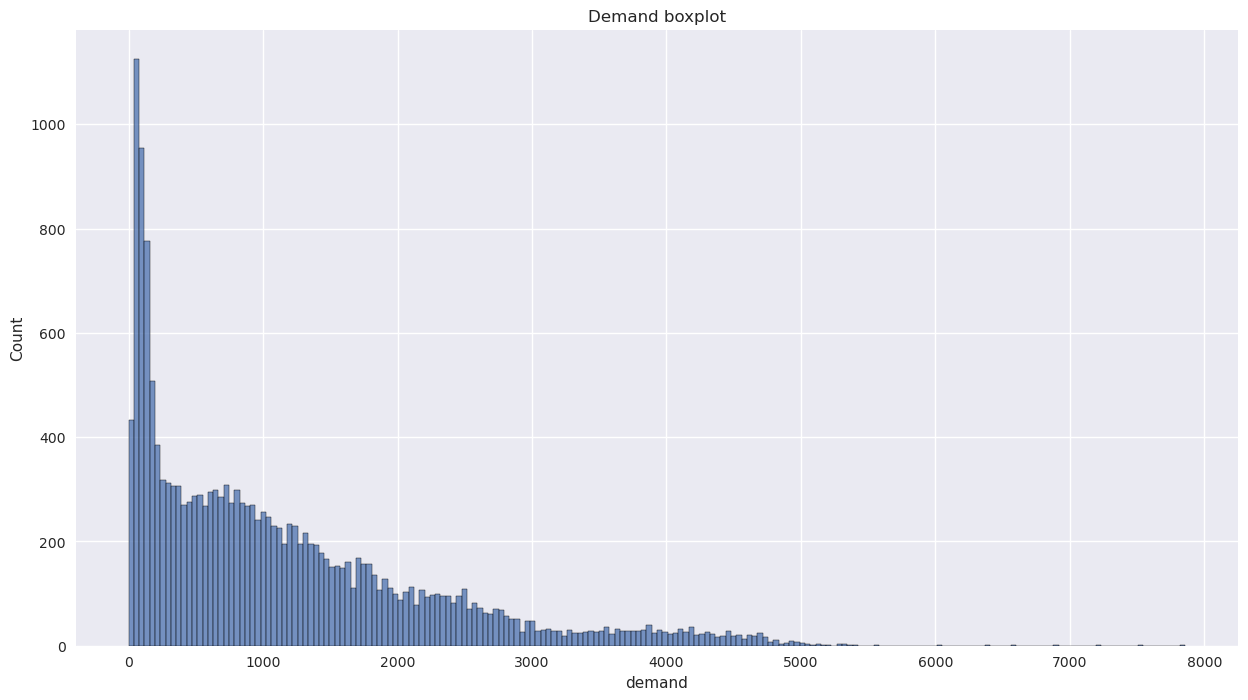

In [47]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.histplot(data = data, x = "demand", bins = 200).set(title = "Demand boxplot")
plt.show()

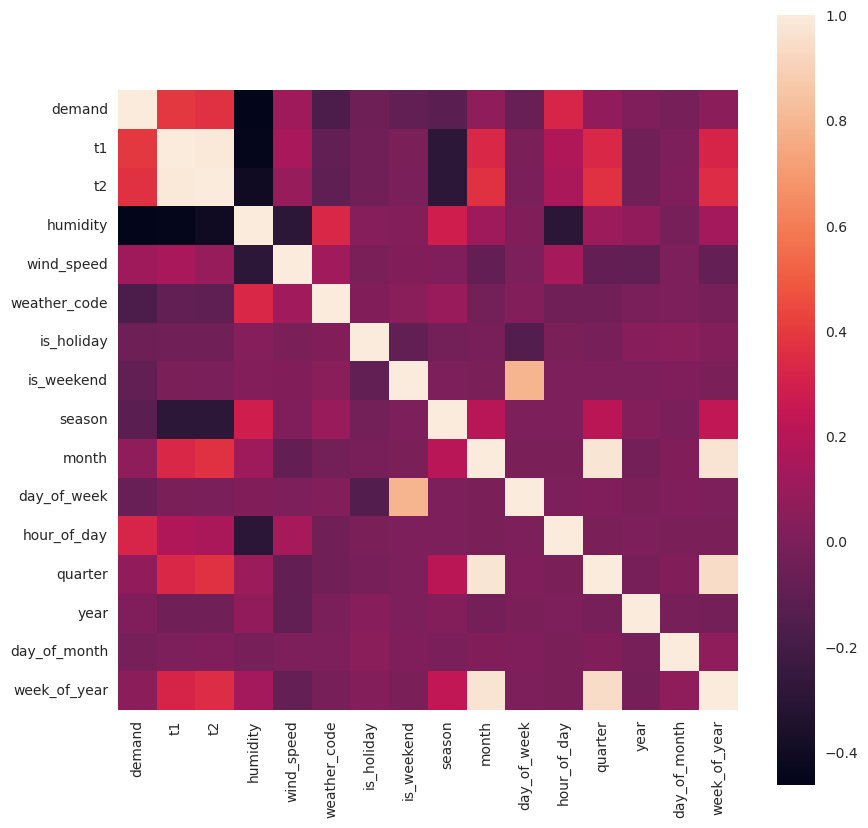

In [48]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(), square = True)
plt.show()

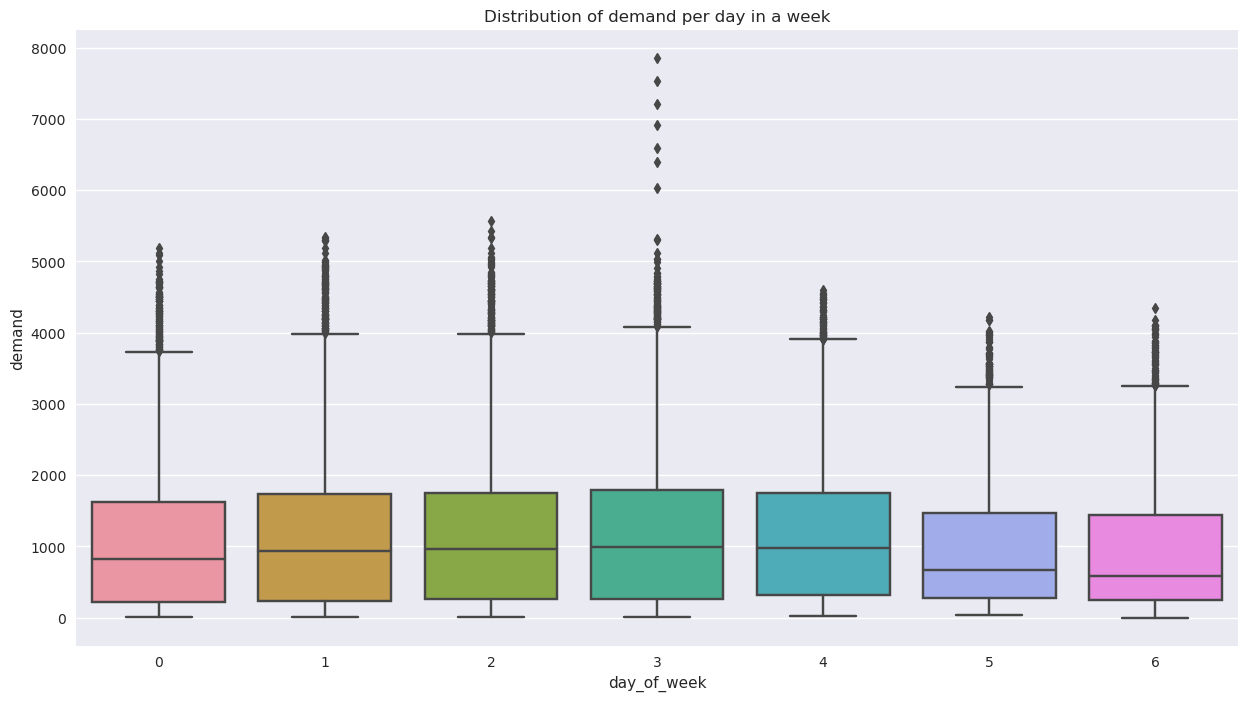

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=data, x='day_of_week', y='demand')
ax.set_title('Distribution of demand per day in a week')
plt.show()

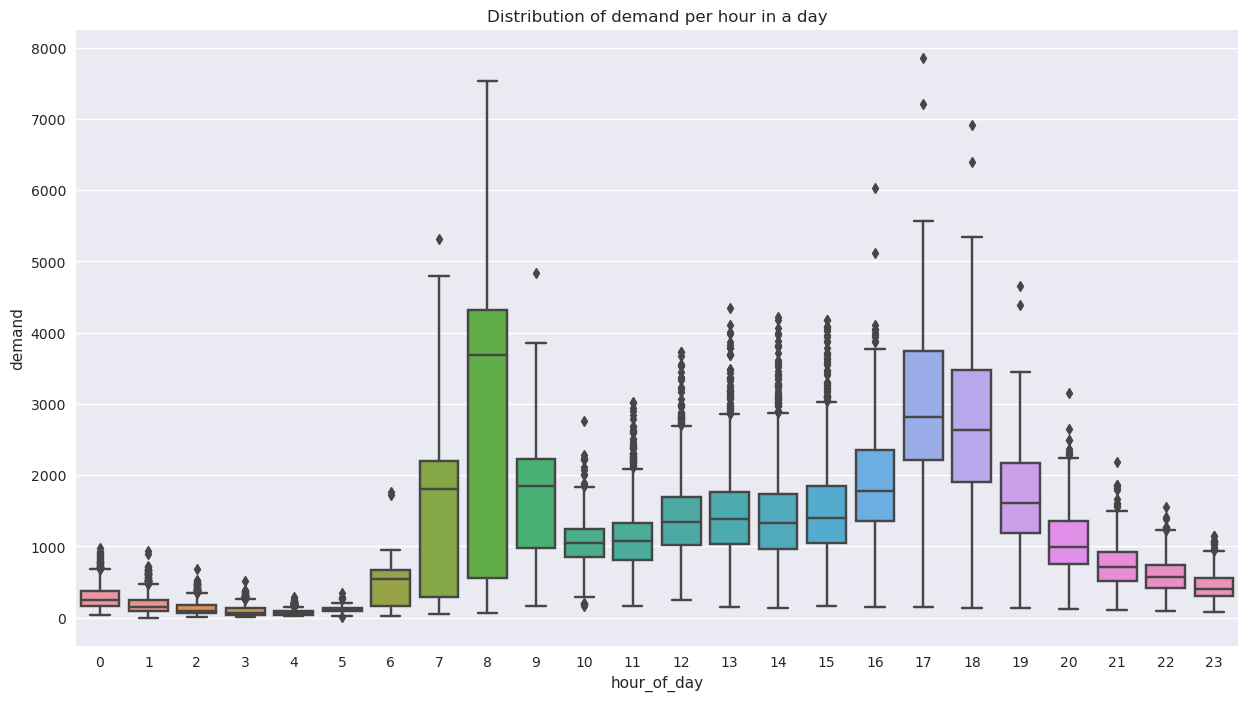

In [50]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=data, x='hour_of_day', y='demand')
ax.set_title('Distribution of demand per hour in a day')
plt.show()

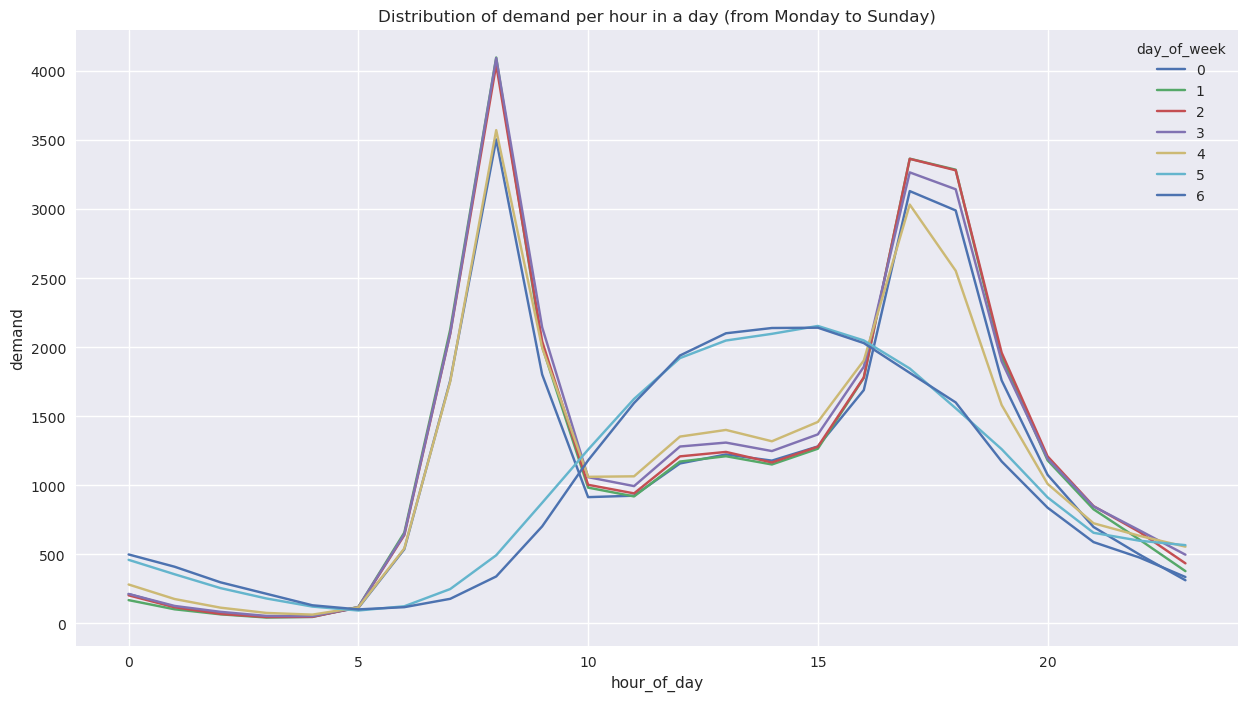

In [51]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=data, x='hour_of_day', y='demand', hue = "day_of_week", palette = sns.color_palette(), errorbar = None)
ax.set_title('Distribution of demand per hour in a day (from Monday to Sunday)')
plt.show()

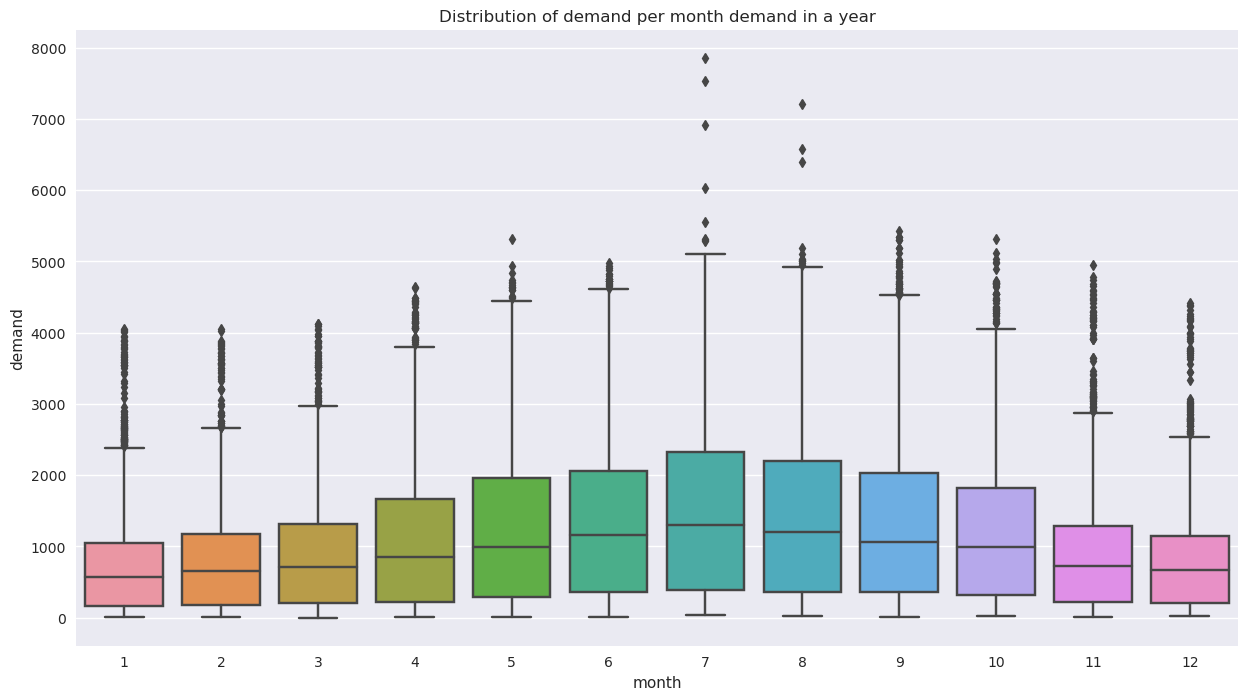

In [52]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=data, x='month', y='demand')
ax.set_title('Distribution of demand per month demand in a year')
plt.show()

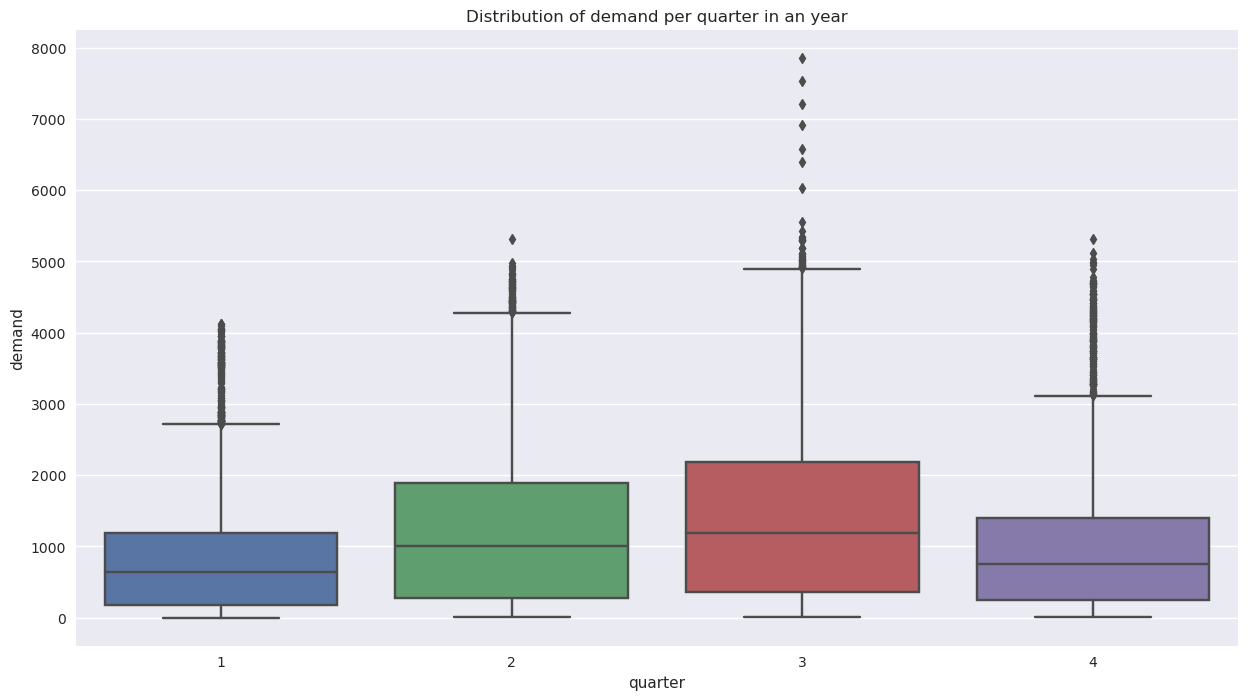

In [53]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=data, x='quarter', y='demand')
ax.set_title('Distribution of demand per quarter in an year')
plt.show()

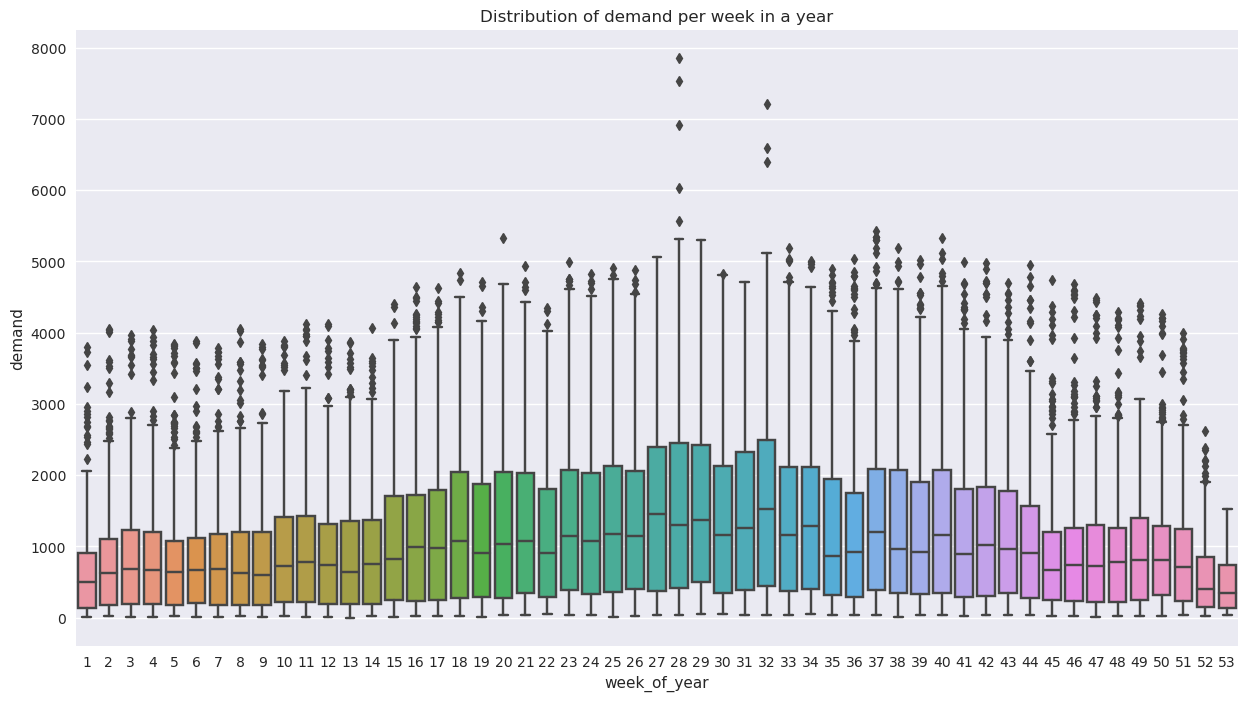

In [54]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=data, x='week_of_year', y='demand')
ax.set_title('Distribution of demand per week in a year')
plt.show()

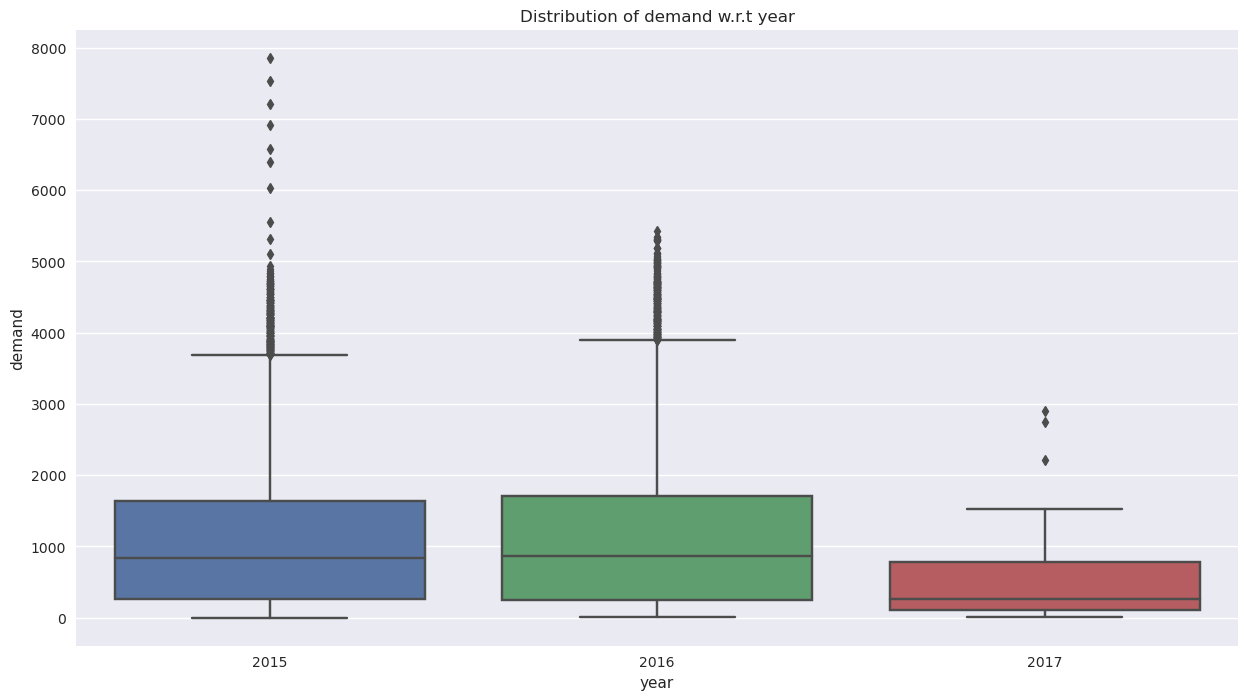

In [55]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=data, x='year', y='demand')
ax.set_title('Distribution of demand w.r.t year')
plt.show()

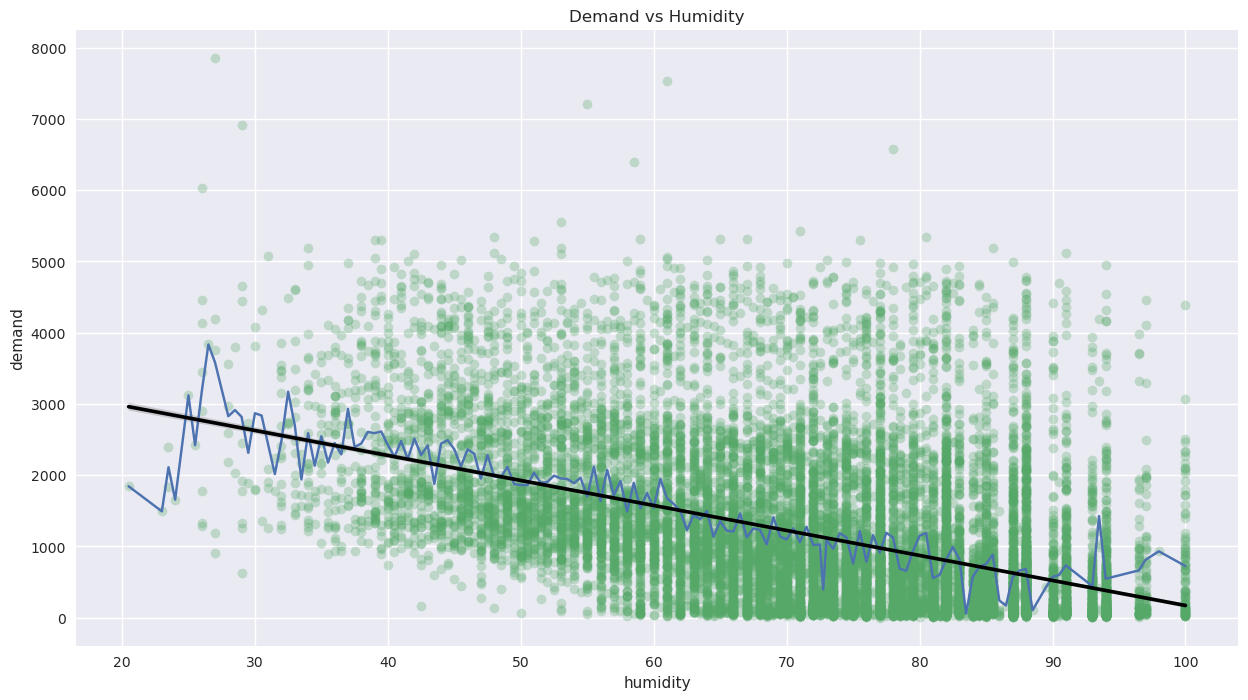

In [56]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=data, x='humidity', y='demand', errorbar = None)
sns.regplot(data=data, x='humidity', y='demand', scatter_kws={'alpha':0.3}, line_kws={'color':'black'})
ax.set_title('Demand vs Humidity')
plt.show()

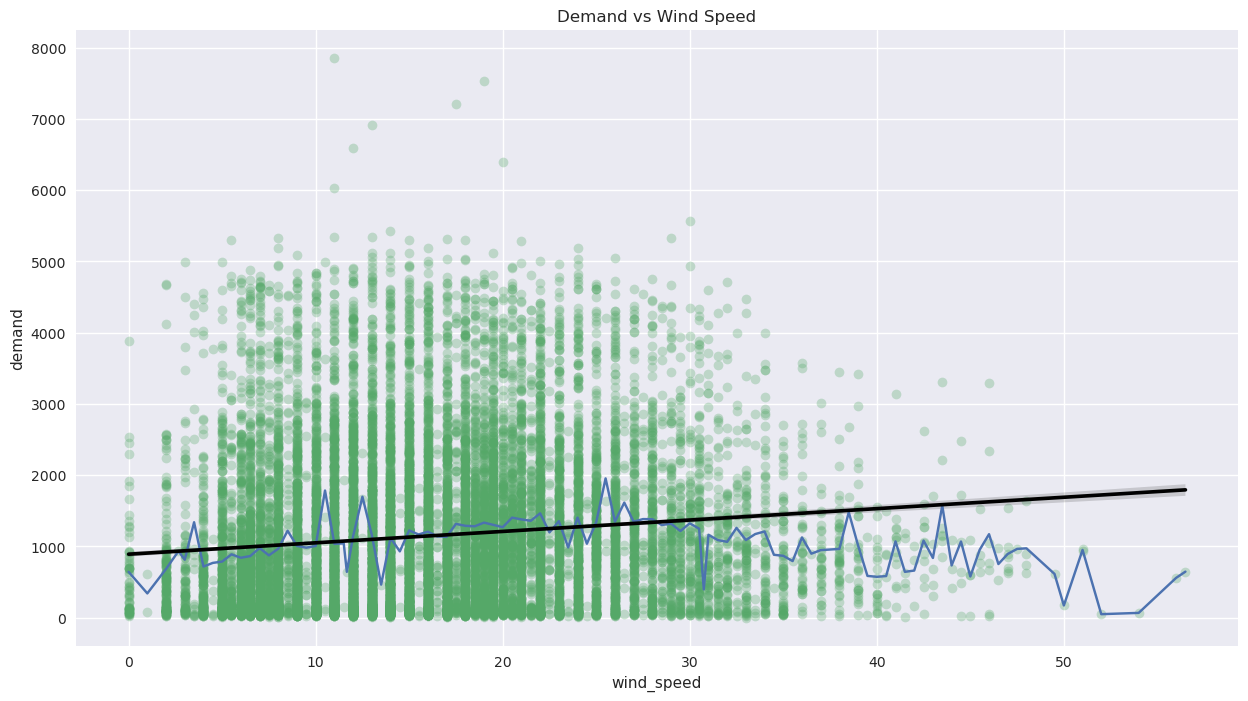

In [57]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=data, x='wind_speed', y='demand', errorbar = None)
sns.regplot(data=data, x='wind_speed', y='demand', scatter_kws={'alpha':0.3}, line_kws={'color':'black'})
ax.set_title('Demand vs Wind Speed')
plt.show()

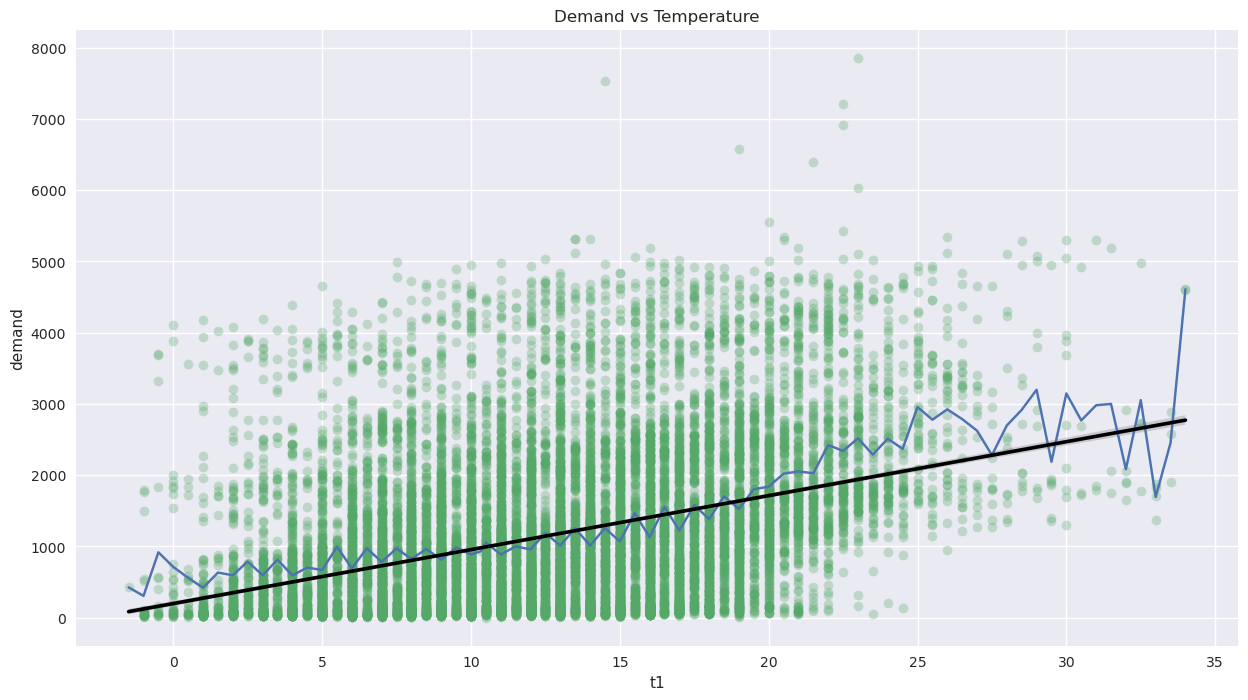

In [58]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=data, x='t1', y='demand', errorbar = None)
sns.regplot(data=data, x='t1', y='demand', scatter_kws={'alpha':0.3}, line_kws={'color':'black'})
ax.set_title('Demand vs Temperature')
plt.show()

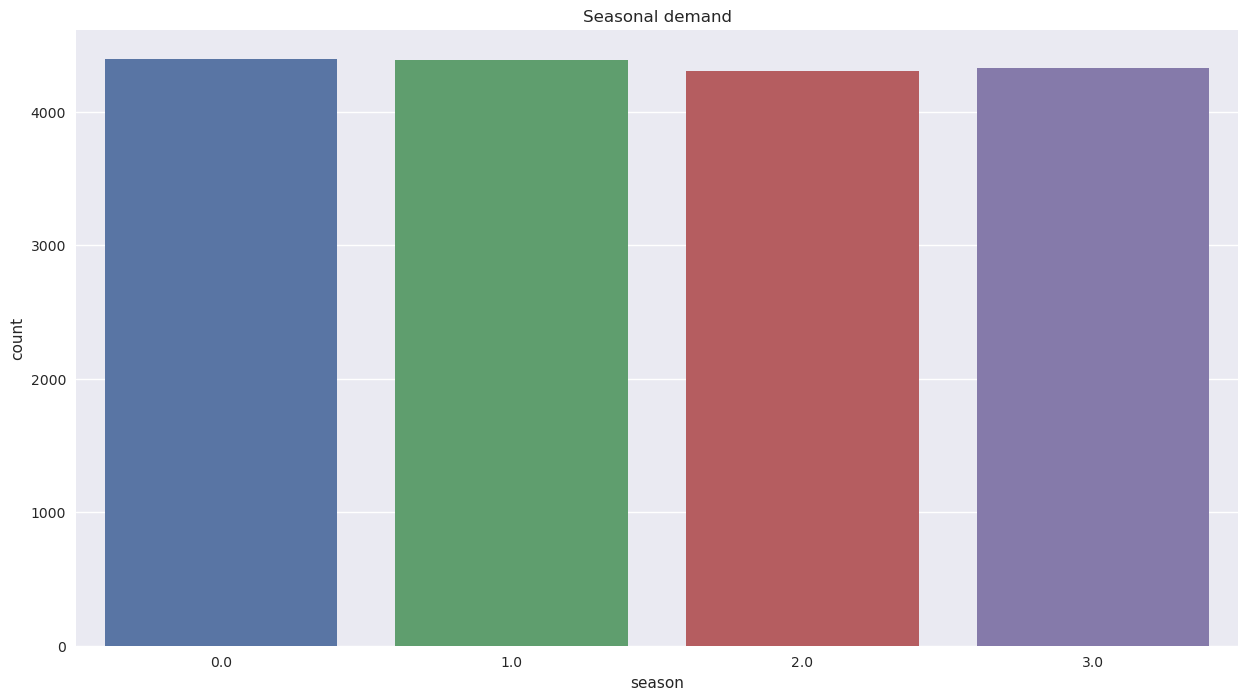

In [59]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=data, x='season')
ax.set_title('Seasonal demand')
plt.show()

# Data processing

In [60]:
data.drop(labels = ["t2"], axis = 1, inplace = True)
data.head()

,demand,t1,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,month,day_of_week,hour_of_day,quarter,year,day_of_month,week_of_year
0,182,3.0,93.0,6.0,3.0,0.0,1.0,3.0,1,6,0,1,2015,4,1
1,138,3.0,93.0,5.0,1.0,0.0,1.0,3.0,1,6,1,1,2015,4,1
2,134,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1,6,2,1,2015,4,1
3,72,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1,6,3,1,2015,4,1
4,47,2.0,93.0,6.5,1.0,0.0,1.0,3.0,1,6,4,1,2015,4,1


In [61]:
scaler_1 = MinMaxScaler()
columns_to_transform = ['t1', 'humidity', 'wind_speed']
transform_1 = scaler_1.fit(data[columns_to_transform].to_numpy())
data.loc[:,columns_to_transform] = transform_1.transform(data[columns_to_transform].to_numpy())

scaler_2 = MinMaxScaler()
transform_2 = scaler_2.fit(data[["demand"]])
data["demand"] = transform_2.transform(data[["demand"]])

In [62]:
''' Dropping the time feature columns'''
data.drop(labels = ["month", "day_of_week", "hour_of_day", "quarter", "year", "day_of_month", "week_of_year"], axis = 1, inplace = True)
data.head()

,demand,t1,humidity,wind_speed,weather_code,is_holiday,is_weekend,season
0,0.023155,0.126761,0.911950,0.106195,3.0,0.0,1.0,3.0
1,0.017557,0.126761,0.911950,0.088496,1.0,0.0,1.0,3.0
2,0.017048,0.112676,0.955975,0.000000,1.0,0.0,1.0,3.0
3,0.009160,0.098592,1.000000,0.000000,1.0,0.0,1.0,3.0
4,0.005980,0.098592,0.911950,0.115044,1.0,0.0,1.0,3.0


In [63]:
df_Y = data["demand"]
df_X = data.drop(labels = ["demand"], axis = 1)

data_array_X, data_array_Y = df_X.values, df_Y.values

In [64]:
''' Preparing the data to feed it into the LSTM model'''

LEN_DATA = (data.shape[0])
SEQ_LENGTH = 24
X, Y = [], []

for i in range(LEN_DATA - SEQ_LENGTH):
    x, y = data_array_X[i:SEQ_LENGTH + i], data_array_Y[SEQ_LENGTH + i]
    x, y = np.array(x), np.array(y)
    X.append(x); Y.append(y)
    
X, Y = np.array(X), np.array(Y)

In [65]:
X_train, Y_train , X_test, Y_test = X[:int(X.shape[0]*0.7)], Y[:int(Y.shape[0]*0.7)], X[int(X.shape[0]*0.7):], Y[int(Y.shape[0]*0.7):]

# Creating the model

In [66]:
def LSTM_model(neurons, time_steps, features):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(neurons,input_shape=(time_steps,features), return_sequences = True)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(neurons, return_sequences = True)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(neurons)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

    return model

In [67]:
model = LSTM_model(neurons = 16, time_steps = 24, features = 7)
model.compile(optimizer = "RMSprop", loss = "mse")

In [68]:
training_logs = model.fit(X_train, Y_train, batch_size = 64, epochs = 120, validation_split = 0.15, verbose = True)

Epoch 1/120
162/162 [==============================] - 24s 64ms/step - loss: 0.0202 - val_loss: 0.0190
Epoch 2/120
162/162 [==============================] - 7s 44ms/step - loss: 0.0169 - val_loss: 0.0184
Epoch 3/120
162/162 [==============================] - 7s 46ms/step - loss: 0.0165 - val_loss: 0.0179
Epoch 4/120
162/162 [==============================] - 7s 45ms/step - loss: 0.0161 - val_loss: 0.0170
Epoch 5/120
162/162 [==============================] - 7s 43ms/step - loss: 0.0151 - val_loss: 0.0151
Epoch 6/120
162/162 [==============================] - 7s 44ms/step - loss: 0.0136 - val_loss: 0.0129
Epoch 7/120
162/162 [==============================] - 7s 44ms/step - loss: 0.0125 - val_loss: 0.0123
Epoch 8/120
162/162 [==============================] - 7s 46ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 9/120
162/162 [==============================] - 7s 43ms/step - loss: 0.0116 - val_loss: 0.0109
Epoch 10/120
162/162 [==============================] - 7s 44ms/step - loss: 0.01

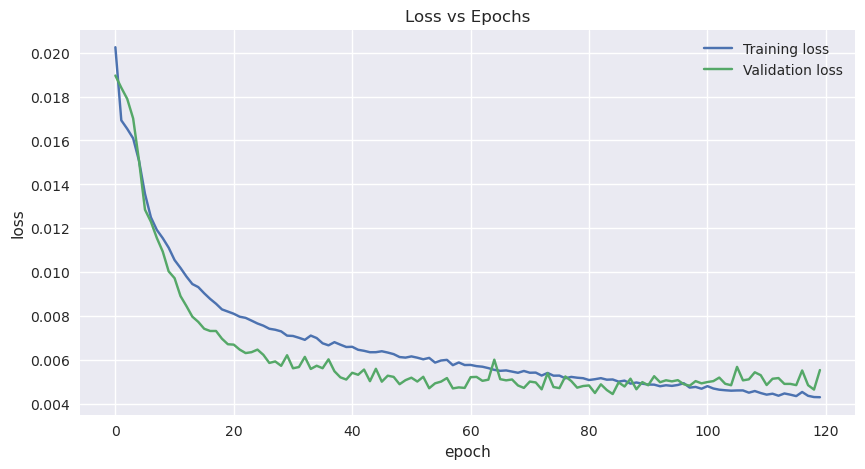

In [69]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(training_logs.history["loss"], label = 'Training loss')
plt.plot(training_logs.history["val_loss"], label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [70]:
Y_pred = model.predict(X_test)

164/164 [==============================] - 4s 11ms/step


In [71]:
Y_pred_rescaled = scaler_2.inverse_transform(Y_pred)
Y_test_rescaled = scaler_2.inverse_transform(Y_test.reshape(-1,1))

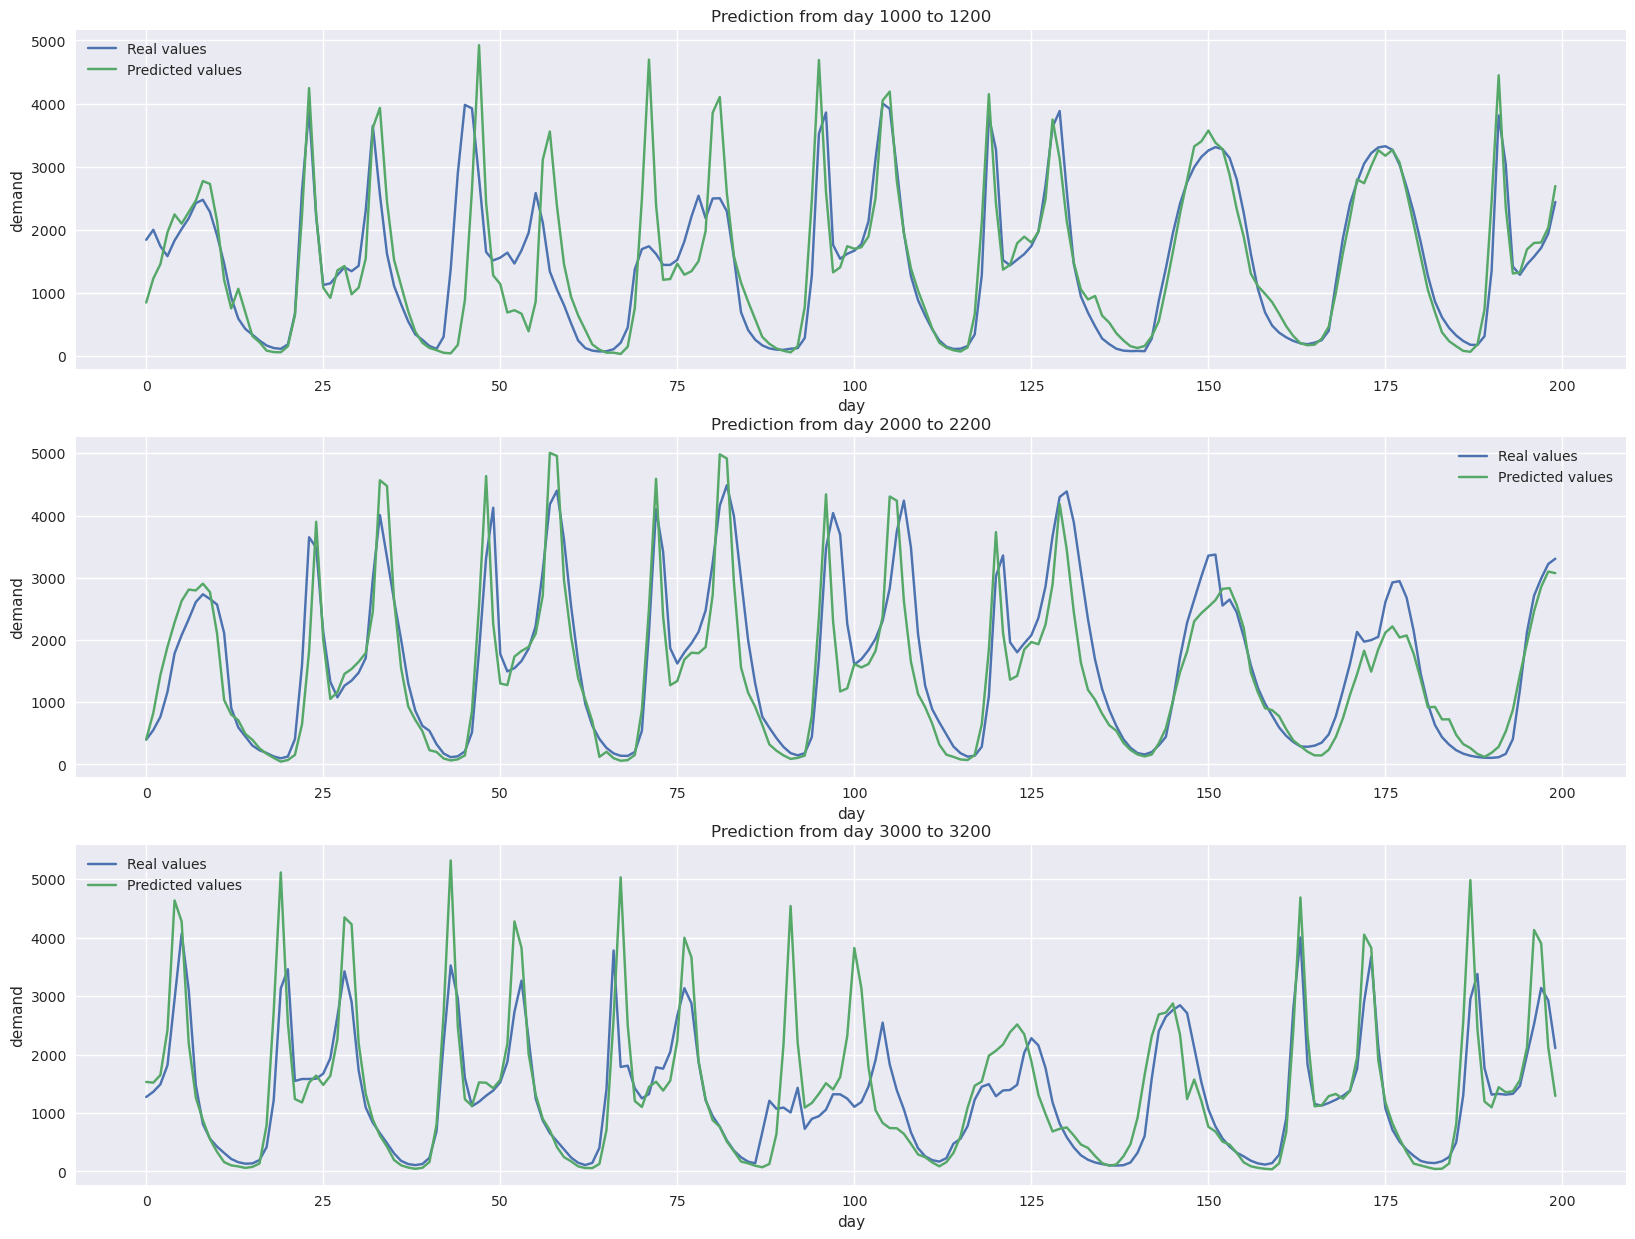

In [87]:
idx = 1000
fig, ax = plt.subplots(figsize = (20, 15))
for i in range(1,4):
    plt.subplot(3, 1, i)
    plt.plot(Y_pred_rescaled[i*idx: i*idx + 200], label = "Real values")
    plt.plot(Y_test_rescaled[i*idx: i*idx + 200], label = "Predicted values")
    plt.title(f"Prediction from day {i*idx} to {i*idx + 200}")
    plt.xlabel("day")
    plt.ylabel("demand")
    plt.legend()
plt.show()

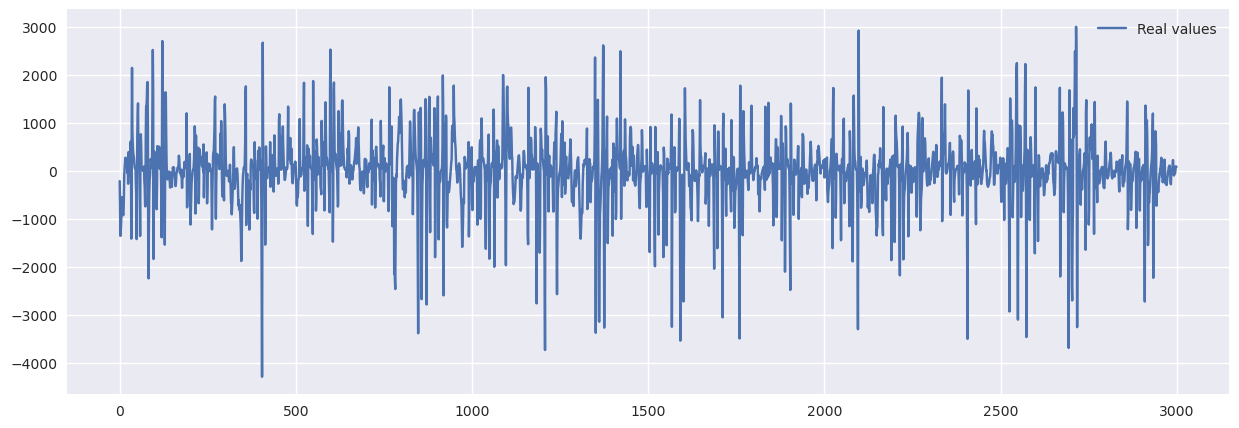

In [73]:
fig, ax = plt.subplots(figsize = (15, 5))
plt.plot(Y_pred_rescaled[idx:idx+3000] - Y_test_rescaled[idx:idx+3000], label = "Real values")
plt.legend()
plt.show()

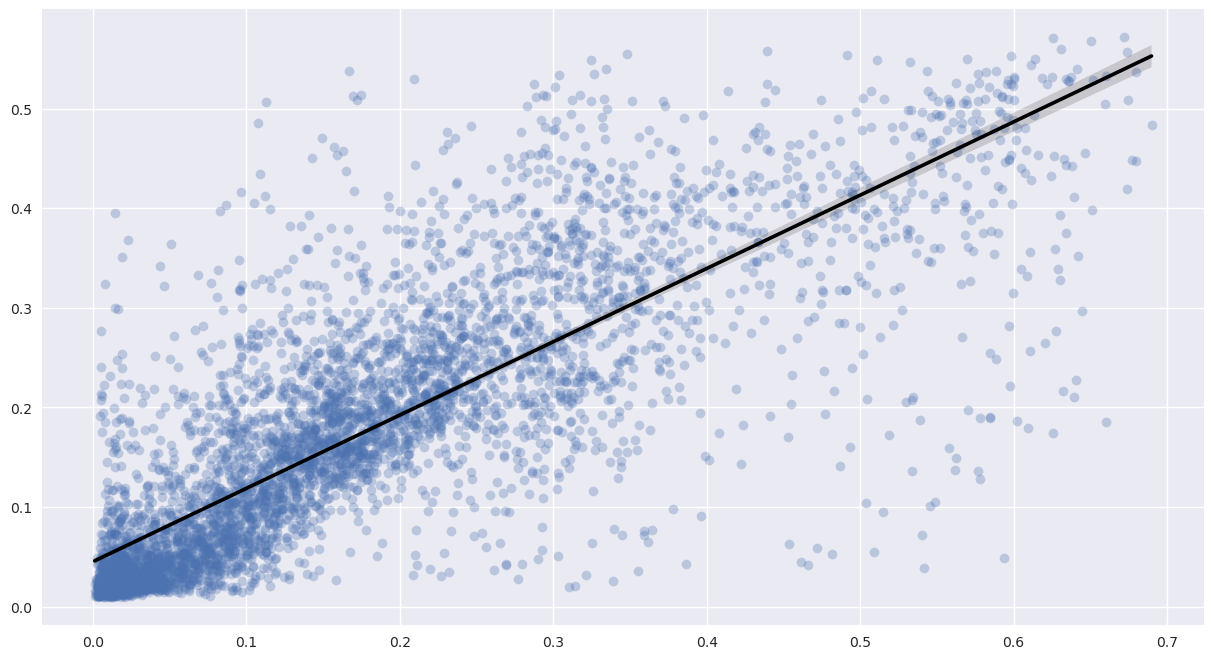

In [74]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.regplot(x = Y_test, y = Y_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'black'})
plt.show()

In [75]:
print(r2_score(Y_test, Y_pred))

0.6676019174883195
